<a href="https://colab.research.google.com/github/honiaazadd/Sport-Car-Prices/blob/main/33_basic_practice_of_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Intro to Statistics

This class, *Intro to Statistics*, builds on probability theory to enable us to quantify our confidence about how distributions of data are related to one another.

Through the measured exposition of theory paired with interactive examples, you’ll develop a working understanding of all of the essential statistical tests for assessing whether data are correlated with each other or sampled from different populations -- tests which frequently come in handy for critically evaluating the inputs and outputs of machine learning algorithms.

Over the course of studying this topic, you'll:

* Develop an understanding of what’s going on beneath the hood of predictive statistical models and machine learning algorithms, including those used for deep learning.


*Segment 1: Frequentist Statistics*

* Frequentist vs Bayesian Statistics
* Review of Relevant Probability Theory
* *z*-scores and Outliers
* *p*-values
* Comparing Means with t-tests
* Confidence Intervals
* ANOVA: Analysis of Variance
* Pearson Correlation Coefficient
* R-Squared Coefficient of Determination
* Correlation vs Causation
* Correcting for Multiple Comparisons

*Segment 2: Regression*

* Features: Independent vs Dependent Variables
* Linear Regression to Predict Continuous Values
* Fitting a Line to Points on a Cartesian Plane
* Ordinary Least Squares
* Logistic Regression to Predict Categories

*Segment 3: Bayesian Statistics*

* (Deep) ML vs Frequentist Statistics
* When to use Bayesian Statistics
* Prior Probabilities
* Bayes’ Theorem
* PyMC3 Notebook
* Resources for Further Study of Probability and Statistics

## Segment 1: Frequentist Statistics

In [ ]:
import numpy as np #for numerical operations array,matrix
import scipy.stats as st #static function : normal distribution, t test
import matplotlib.pyplot as plt #basic plotting: histogrsm,line chart
import seaborn as sns #static plots wakw box plot

In [ ]:
# seed to generate same random forall students
np.random.seed(42)

### Measures of Central Tendency

Measures of central tendency provide a summary statistic on the center of a given distribution, a.k.a., the "average" value of the distribution.

![](https://github.com/honiaazadd/Sport-Car-Prices/blob/main/c0ban_logo.png?raw=1)

***
___
---

<div class="alert alert-block alert-info">
    <p> <b>Important info:</b> </p> For learning, there is nothing better than doing.
    <p><b><i>Share your project on GitHub</i></b></p>
</div>

<div class="alert alert-block alert-warning">
    <p><b>Your project reflects your character:</b></p> When you plot your data set, you have to discuss different distributions for it, e.g., _ central tendecy, mean, outlier, trend...etc._
</div>

<div class="alert alert-block alert-success">
<b>How to get a full mark:</b> Be smart and find interested information which lead you insight to the domain of your data set. Because half of the project marks is open ended question which depends on your finding.
</div>

<div class="alert alert-block alert-danger">
<b>Just pass:</b> You may be pass in the project by only doing what we practice in the lab, so it is up to you.
</div>

In [ ]:
x = st.skewnorm.rvs(-10, size=1000) #dyarikrdni skew rasmi distribution

# arg1 default is 1 (normal) above that generate right skweed
# and below it will generate left skweed
# the amount of skeeness depend on the number ratio to size

In [ ]:
x[0:20]

array([-0.48199355, -0.05818994, -0.747332  , -0.49426512, -1.93959612,
       -0.34512055,  0.04716293, -0.65907107, -0.54824217, -0.97979581,
       -1.5902647 , -0.89086122, -0.63724768, -0.79622009, -0.88342862,
       -0.29618677, -0.11202152, -1.71210756, -0.67715656, -1.28800845])

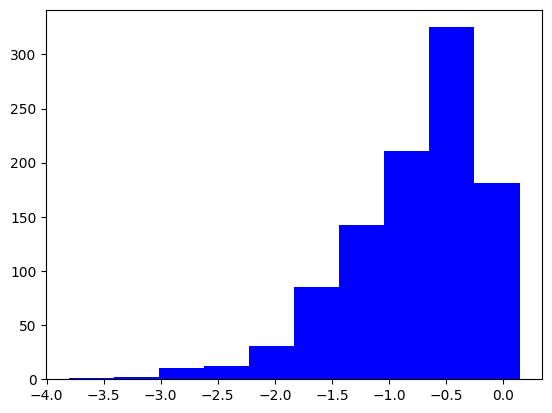

In [ ]:
fig, ax = plt.subplots()
_ = plt.hist(x, color = 'blue')

#### Mean

The most common measure of central tendency, synonomous with the term "average", is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):

$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

In [ ]:
xbar = x.mean()
xbar

np.float64(-0.7774240885394387)

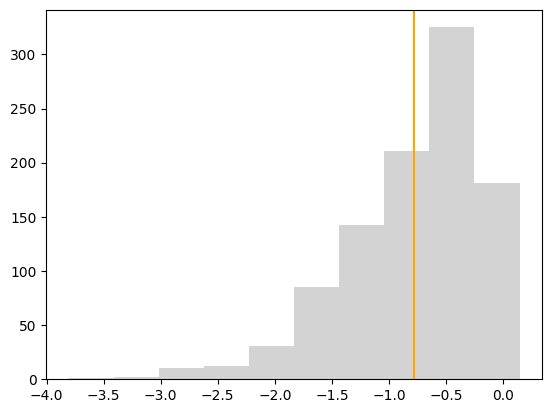

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = x.mean(), color='orange')
_ = plt.hist(x, color = 'lightgray')

#### Median

The second most common measure of central tendency is the **median**, the midpoint value in the distribution:

In [ ]:
np.median(x)

np.float64(-0.633566931865011)

The **mode** is least impacted by skew, but is typically only applicable to discrete distributions. For continuous distributions with skew (e.g., salary data), median is typically the choice measure of central tendency:

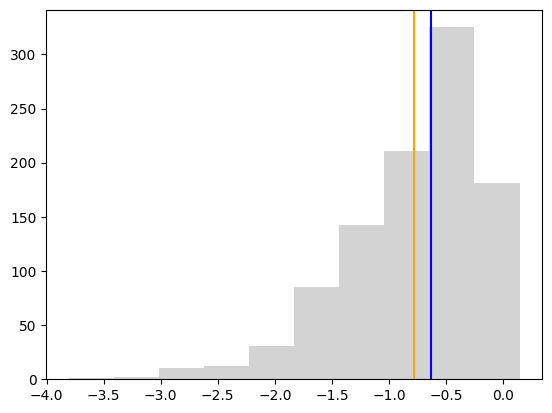

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='blue')
_ = plt.hist(x, color = 'lightgray')

### Measures of Dispersion

#### Variance

$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$

In [ ]:
x.var() #variance

np.float64(0.35844083730341436)

#### Standard Deviation

A straightforward derivative of variance is **standard deviation** (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution:
$$ \sigma = \sqrt{\sigma^2} $$

In [ ]:
x.var()**(1/2) #standard deviation

np.float64(0.5986992878761543)

In [ ]:
sigma = x.std() #dozinaway away chan sigma dwra la mean
sigma

np.float64(0.5986992878761543)

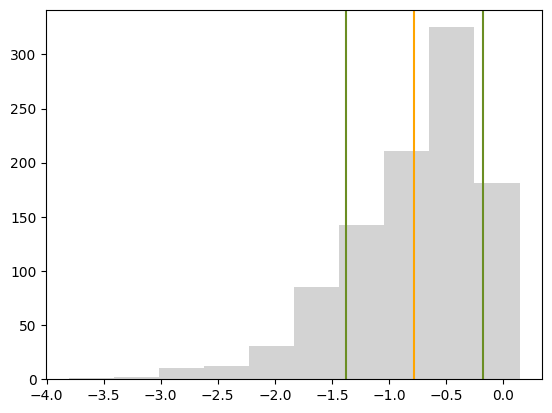

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange') #xbar mean
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'lightgray')

#### Standard Error

A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_\bar{x}$:
$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$

In [ ]:
sigma/(x.size)**(1/2)

np.float64(0.018932533832094804)

In [ ]:
st.sem(x) # standard error

np.float64(0.018942007204632638)

In [ ]:
st.sem(x, ddof=0)#standard error with zero degree of

np.float64(0.018932533832094804)

Standard error enables us to compare whether the means of two distributions differ *significantly*, a focus of *Intro to Stats*.

### Gaussian Distribution

After Carl Friedrich Gauss. Also known as **normal distribution**:

In [ ]:
x = np.random.normal(size=10000)

In [ ]:
sns.set_style('ticks')

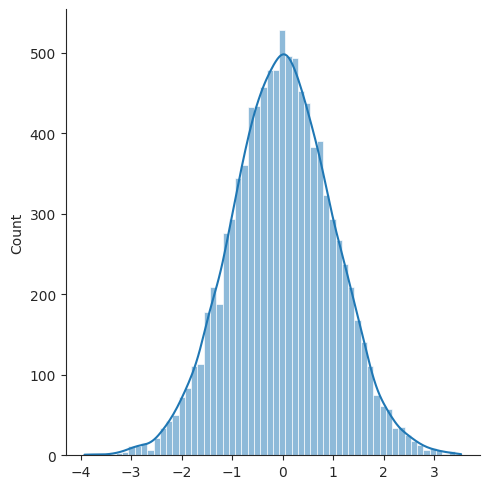

In [ ]:
_ = sns.displot(x, kde=True) #true bkayn ba false aw xata namene

When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with the NumPy `normal()` method...

In [ ]:
x.mean()

np.float64(-0.00770461253877578)

In [ ]:
x.std()

np.float64(1.003110402872648)

...it is a **standard normal distribution** (a.k.a., standard Gaussian distribution or ***z*-distribution**), which can be denoted as $\mathcal{N}(\mu, \sigma^2) = \mathcal{N}(0, 1)$ (noting that $\sigma^2 = \sigma$ here because $1^2 = 1$).

Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because:

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this tutorial.
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called **central limit theorem** (covered next) is a critically important concept.

### The Central Limit Theorem

To develop a functional understanding of the CLT, let's sample some values from our normal distribution:

In [ ]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([-0.45269015,  1.34443391,  0.10248464,  0.65589214, -0.99169666,
       -1.27708456,  0.20323595, -1.72918289,  0.6325828 ,  0.58388302])

The mean of a sample isn't always going to be close to zero with such a small sample:

In [ ]:
x_sample.mean()

np.float64(-0.09281417992433592)

Let's define a function for generating **sampling distributions** of the mean of a given input distribution:

In [ ]:
def sample_mean_calculator(input_dist, sample_size, n_samples): #sample size w n sample w input distributionman haya
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

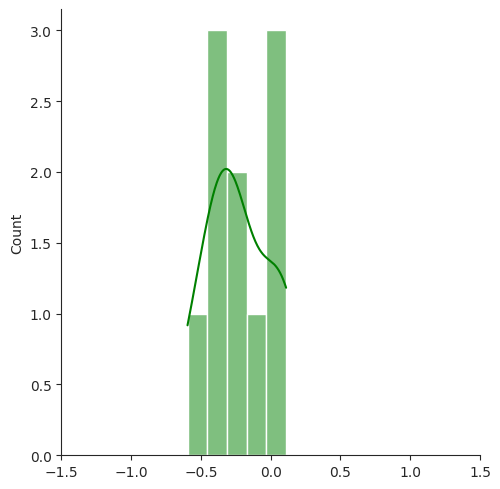

In [ ]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

The more samples we take, the more likely that the sampling distribution of the means will be normally distributed:

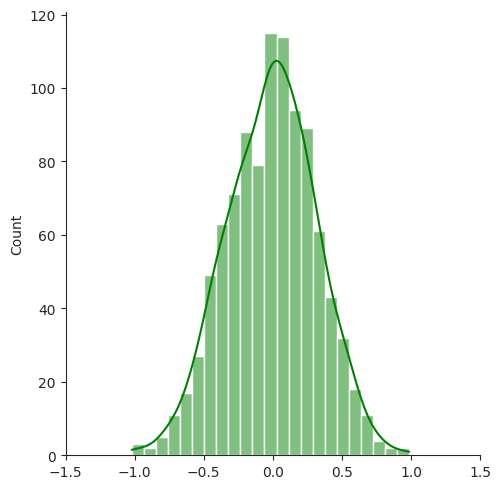

In [ ]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5) #rangey rasmaka

The larger the sample, the tighter the sample means will tend to be around the population mean:

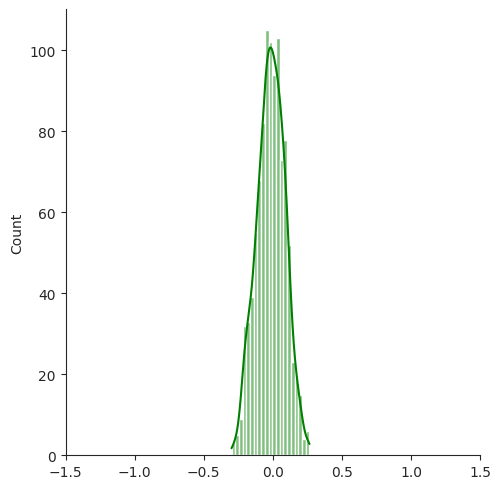

In [ ]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

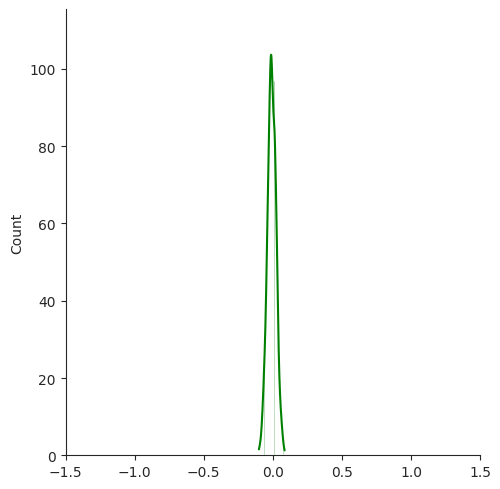

In [ ]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

#### Sampling from a skewed distribution

In [ ]:
s = st.skewnorm.rvs(10, size=10000)

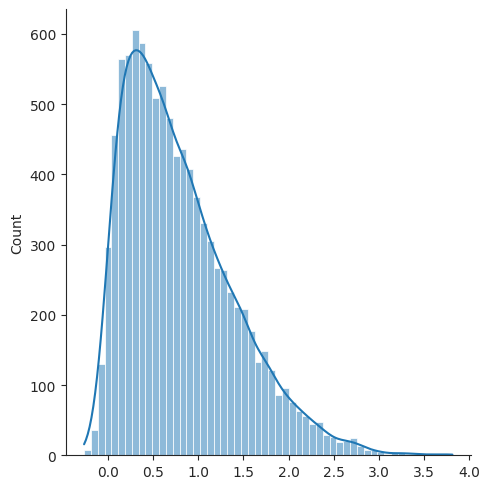

In [ ]:
_ = sns.displot(s, kde=True)

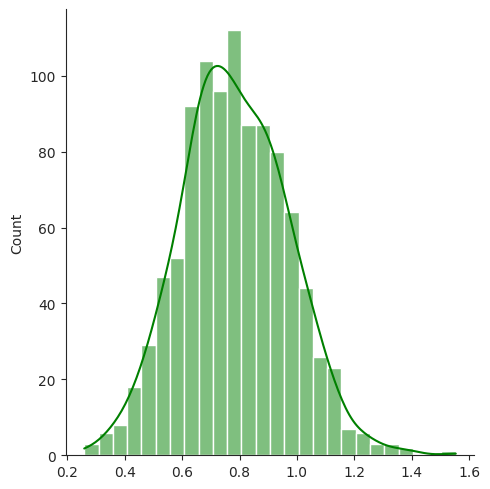

In [ ]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

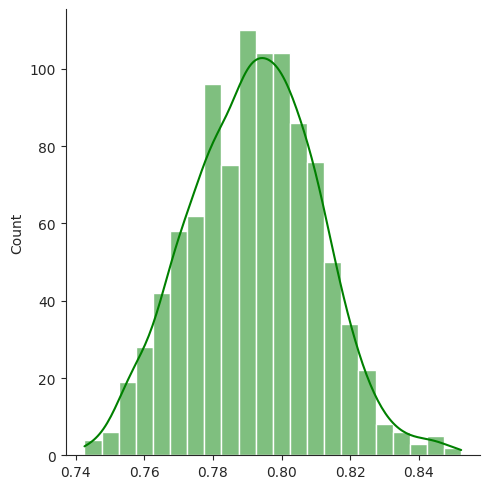

In [ ]:
_ = sns.displot(sample_mean_calculator(s, 1000, 1000), color='green', kde=True)

#### Sampling from a multimodal distribution

In [ ]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))

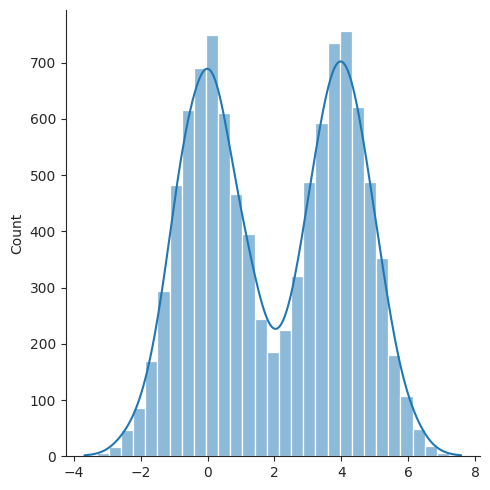

In [ ]:
_ = sns.displot(m, kde=True) #dw normal distributionman haya

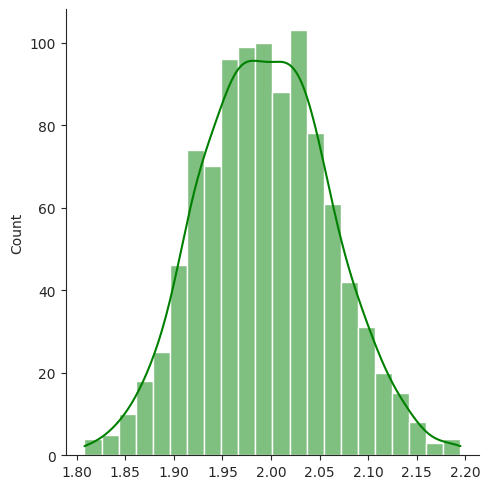

In [ ]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

#### Sampling from uniform

Even sampling from the highly non-normal uniform distribution, the sampling distribution comes out normal:

In [ ]:
u = np.random.uniform(size=10000)

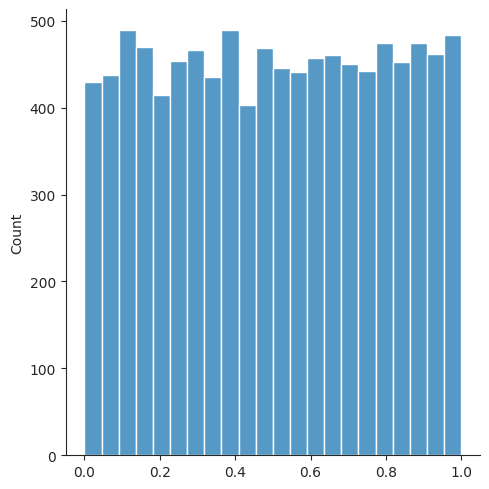

In [ ]:
_ = sns.displot(u)

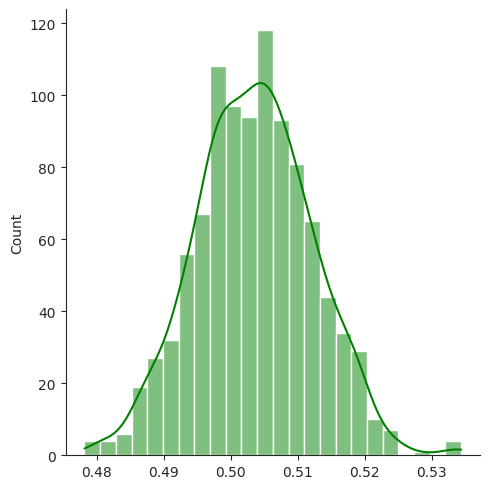

In [ ]:
_ = sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to apply statistical and ML models that are configured for normally distributed noise, which is often the default assumption.

As an example, the "*t*-test" (covered shortly in *Intro to Stats*) allows us to infer whether two samples come from different populations (say, an experimental group that receives a treatment and a control group that receives a placebo). Thanks to the CLT, we can use this test even if we have no idea what the underlying distributions of the populations being tested are, which may be the case more frequently than not.

# Until here on 31/3/2022

### z-scores

Assuming normally-distributed data, a z-score indicates how many standard deviations away from the mean a data point (say, $x_i$) is:
$$ z = \frac{x_i-\mu}{\sigma} $$

That is, the formula *standardizes* a given score $x_i$ to the (standard normal) *z*-distribution. (As we covered in *Probability & Information Theory*, you could standardize any normal distribution to a mean of zero and standard deviation of one by subtracting its original mean and then dividing by its original standard deviation.)

For example, let's say you get 85% on a CS101 exam. Sounds like a pretty good score and you did extremely well relative to your peers if the mean was 60% with a standard deviation of 10%:

In [ ]:
x_i = 85 # linea moraka
mu = 60 #mean
sigma = 10 #10 sigma hatwa bamlawa la meanawa

In [ ]:
x = np.random.normal(mu, sigma, 10000) #normal distributionman drwskrdwa

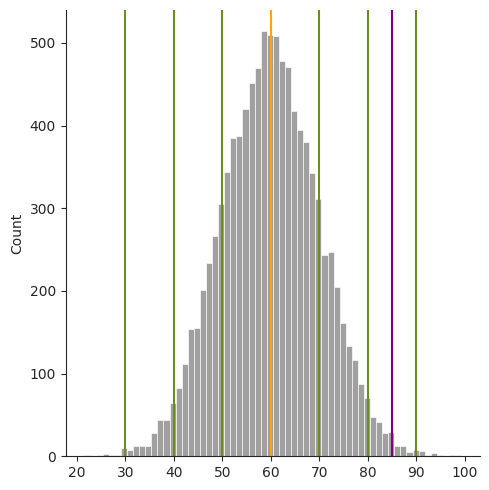

In [ ]:
sns.displot(x, color='gray')
ax.set_xlim(0, 100)
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

Your z-score is 2.5 standard deviations above the mean:

In [ ]:
z = (x_i - mu)/sigma
z

2.5

Or using our simulated class of 10k CS101 students:

In [ ]:
z = (x_i - np.mean(x))/np.std(x)
z

np.float64(2.500270099385691)

Less than one percent of the class outperformed you:

In [ ]:
len(np.where(x > 85)[0])

63

In [ ]:
100*69/10000

0.69

In [ ]:
np.percentile(x, 99)

np.float64(83.36172966092951)

In contrast, if the mean score of your peers is 90 and the standard deviation is 2:

In [ ]:
mu = 90
sigma = 2

In [ ]:
y = np.random.normal(mu, sigma, 10000)

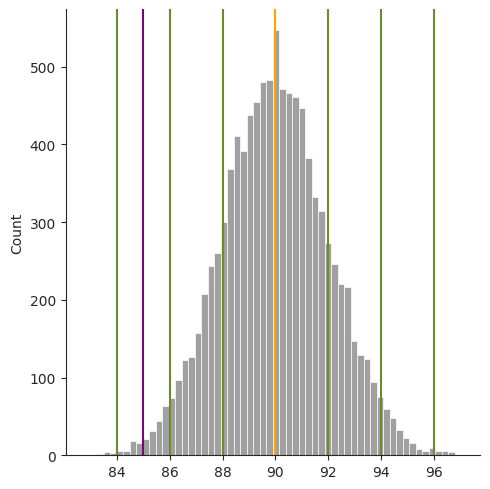

In [ ]:
sns.displot(y, color='gray')
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

Your z-score is 2.5 standard deviations *below* the mean (!):

In [ ]:
z = (x_i - mu)/sigma
z

-2.5

Or using our simulated class of 10k CS101 students:

In [ ]:
z = (x_i - np.mean(y))/np.std(y)
z

np.float64(-2.490327139730642)

In which case, over 99% of the class outperformed you:

In [ ]:
len(np.where(y > 85)[0])

9942

In [ ]:
100*9933/10000 #chany dataka la 85 gawratra wata akaweta sarw 85

99.33

A mere 67 folks attained worse:

In [ ]:
10000-9933 #mabaqy la 85 kamtra

67

In [ ]:
np.percentile(y, 1)

np.float64(85.43149682711204)